In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
"""
dummydf=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv")
#include only numerical columns
dummydf=dummydf.select_dtypes(include='number')
#remove columns with all NAN values
dummydf = dummydf.dropna(axis=1, how='all') #axis=0 for rows
print(dummydf.head())
"""
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)

df.head()
#creating list from dataframe values
run_scored = df['runs_scored'].tolist()
run_scored[:5]  # Display first 5 values
ascending_order = sorted(run_scored)  # Sort the list in ascending order
print(ascending_order[:5])  # Display first 5 values of the sorted list
descending_order = sorted(run_scored, reverse=True)  # Sort the list in descending order

print(descending_order[:5])  # Display first 5 values of the sorted list in descending order
# Plotting the runs scored by players



[0, 0, 0, 0, 0]
[424, 410, 400, 393, 380]


In [4]:
#Creating coorelation matrix using runs_scored,balls_faced,fours_scored,sixes_scored
#created a new dataframe with player_id and their average stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)
player_stats=df.groupby('player_id').agg({
    'runs_scored': 'mean',
    'balls_faced': 'mean',
    'fours_scored': 'mean',
    'sixes_scored': 'mean',
    'balls_bowled': 'mean',
    'runs_conceded': 'mean',
    'wickets_taken': 'mean',
    'fantasy_score_batting': 'mean',
    'fantasy_score_bowling': 'mean',
    'fantasy_score_total': 'mean'
}).reset_index()
#changing the column names
player_stats.columns = ['player_id', 'avg_runs_scored', 'avg_balls_faced', 'avg_fours_scored', 'avg_sixes_scored','avg_balls_bowled', 'avg_runs_conceded', 'avg_wickets_taken', 'avg_fantasy_score_batting', 'avg_fantasy_score_bowling', 'avg_fantasy_score_total']
# creating the correlation matrix
correlation_matrix_batters = player_stats[['avg_runs_scored', 'avg_balls_faced', 'avg_fours_scored', 'avg_sixes_scored']].corr()
# Displaying the correlation matrix_batters
print("Correlation Matrix for Batters:")
print(correlation_matrix_batters)
#creating the correlation matrix for bowlers
correlation_matrix_bowling = player_stats[['avg_balls_bowled', 'avg_runs_conceded', 'avg_wickets_taken', 'avg_fantasy_score_bowling']].corr()
# Displaying the correlation matrix_bowling
print("Correlation Matrix for Bowlers:")
print(correlation_matrix_bowling)

Correlation Matrix for Batters:
                  avg_runs_scored  avg_balls_faced  avg_fours_scored  \
avg_runs_scored          1.000000         0.874476          0.950159   
avg_balls_faced          0.874476         1.000000          0.862373   
avg_fours_scored         0.950159         0.862373          1.000000   
avg_sixes_scored         0.578805         0.264325          0.439369   

                  avg_sixes_scored  
avg_runs_scored           0.578805  
avg_balls_faced           0.264325  
avg_fours_scored          0.439369  
avg_sixes_scored          1.000000  
Correlation Matrix for Bowlers:
                           avg_balls_bowled  avg_runs_conceded  \
avg_balls_bowled                   1.000000           0.927705   
avg_runs_conceded                  0.927705           1.000000   
avg_wickets_taken                  0.765566           0.782313   
avg_fantasy_score_bowling          0.636704           0.663232   

                           avg_wickets_taken  avg_fantasy_s

From the result of above coorelation matrix the following relation  is clearly observed

                        avg_run_scored                        avg_fours_scored
avg_balls_faced                     strong(<90  and >70)                  very strong( >90)

hence we can use avg_ball_faced(independent) and avg_fantasy_score_batter(dependent) to find the relationship between them.
Once found ,then we will use given data to know avg_ball_faced/player_id then with the help of gained relationship we will calculate the fantasy score.Finally we will be able to choose best batters from the list of batters for our batting order of our team. Similarly with the bowlers and wicket keeper.We have to use different columns in the respective cases.


  player_id  avg_balls_faced  avg_fantasy_score_batting
0  00015688        13.600000                   0.800000
1  00029c30         1.571429                   0.714286
2  0019ca13         2.000000                   1.000000
3  0030a57d         3.285714                   4.952381
4  00321fff         1.967742                   1.032258


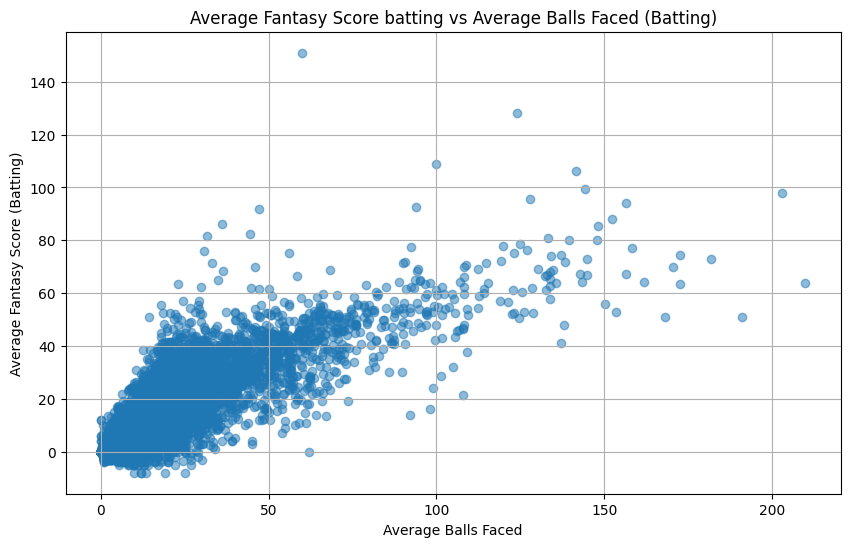

  player_id  avg_balls_bowled  avg_fantasy_score_bowling
0  00015688          0.000000                   1.600000
1  00029c30         11.142857                  15.142857
2  0019ca13          6.000000                   0.000000
3  0030a57d          0.000000                   4.000000
4  00321fff         20.774194                  31.193548


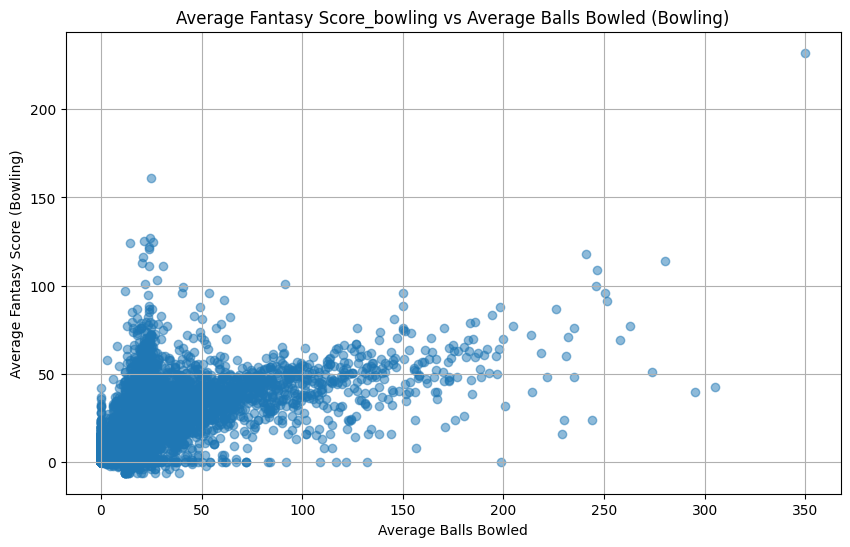

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)
#creating a dataframe with avg_balls_faced and avg_fansasy_score_batting
avg_stats_batting_df = df.groupby('player_id')[['balls_faced', 'fantasy_score_batting']].mean().reset_index()
# Renaming columns for clarity
avg_stats_batting_df.columns = ['player_id', 'avg_balls_faced', 'avg_fantasy_score_batting']
print(avg_stats_batting_df.head())
# Plotting the average fantasy score  batting vs average balls faced batting
plt.figure(figsize=(10, 6))
plt.scatter(avg_stats_batting_df['avg_balls_faced'], avg_stats_batting_df['avg_fantasy_score_batting'], alpha=0.5)
plt.title('Average Fantasy Score batting vs Average Balls Faced (Batting)')
plt.xlabel('Average Balls Faced')
plt.ylabel('Average Fantasy Score (Batting)')
plt.grid(True)
plt.show()
# Plotting the average fantasy score bowling vs average balls bowled
avg_stats_bowling_df = df.groupby('player_id')[['balls_bowled', 'fantasy_score_bowling']].mean().reset_index()
# Renaming columns for clarity
avg_stats_bowling_df.columns = ['player_id', 'avg_balls_bowled', 'avg_fantasy_score_bowling']
print(avg_stats_bowling_df.head())
# Plotting the average fantasy score bowling vs average balls bowled
plt.figure(figsize=(10, 6))
plt.scatter(avg_stats_bowling_df['avg_balls_bowled'], avg_stats_bowling_df['avg_fantasy_score_bowling'], alpha=0.5)
plt.title('Average Fantasy Score_bowling vs Average Balls Bowled (Bowling)')
plt.xlabel('Average Balls Bowled')
plt.ylabel('Average Fantasy Score (Bowling)')
plt.grid(True)
plt.show()



Predicted values  [ 9.13 21.51  1.5 ]
Real values       [ 7.78571429 25.6746988   2.33333333]
Trained W         0.67
Trained b         0.16


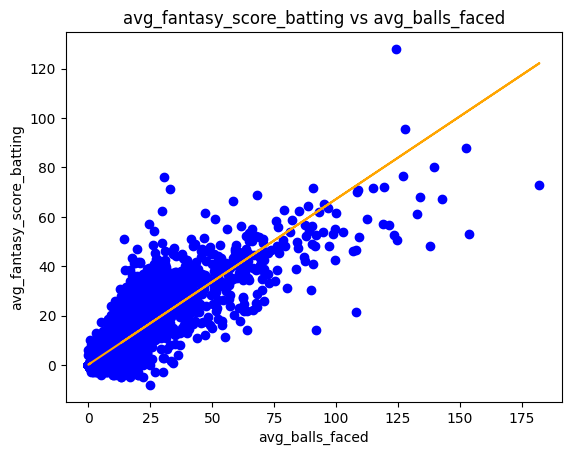

Predicted values  [90.56  0.69 13.2 ]
Real values       [56.55357143  4.72289157  2.        ]
Trained W         0.56
Trained b         0.69


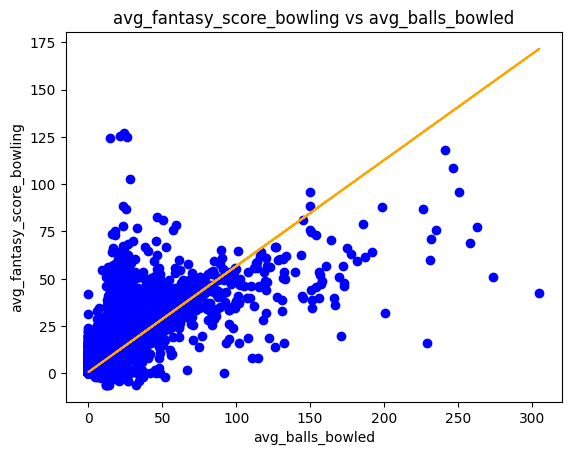

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)
avg_stats_batting_df = df.groupby('player_id')[['balls_faced', 'fantasy_score_batting']].mean().reset_index()
# Renaming columns for clarity
avg_stats_batting_df.columns = ['player_id', 'avg_balls_faced', 'avg_fantasy_score_batting']
avg_stats_bowling_df = df.groupby('player_id')[['balls_bowled', 'fantasy_score_bowling']].mean().reset_index()
# Renaming columns for clarity
avg_stats_bowling_df.columns = ['player_id', 'avg_balls_bowled', 'avg_fantasy_score_bowling']
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.b = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            Y_predicted = np.dot(X, self.W) + self.b

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (Y_predicted - Y))
            db = (1 / n_samples) * np.sum(Y_predicted - Y)

            # Update parameters
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b
    

# for batters
def main_batting():
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    # Assuming avg_stats_batting_df is already defined
    df = avg_stats_batting_df  

    # Convert to NumPy arrays
    X = df['avg_balls_faced'].values.reshape(-1, 1)
    Y = df['avg_fantasy_score_batting'].values

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1/3, random_state=0
    )

    # Train model
    model = MyLinearRegression(learning_rate=0.0001, iterations=1000)
    model.fit(X_train, Y_train)

    # Predict
    Y_pred = model.predict(X_test)

    print("Predicted values ", np.round(Y_pred[:3], 2))
    print("Real values      ", Y_test[:3])
    print("Trained W        ", round(model.W[0], 2))
    print("Trained b        ", round(model.b, 2))

    # Plot
    plt.scatter(X_test, Y_test, color='blue')
    plt.plot(X_test, Y_pred, color='orange')
    plt.title('avg_fantasy_score_batting vs avg_balls_faced')
    plt.xlabel('avg_balls_faced')
    plt.ylabel('avg_fantasy_score_batting')
    plt.show()

if __name__ == "__main__":
    main_batting()

# for bowlers
def main_bowling():
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    # Assuming avg_stats_bowling_df is already defined
    df = avg_stats_bowling_df  

    # Convert to NumPy arrays
    X = df['avg_balls_bowled'].values.reshape(-1, 1)
    Y = df['avg_fantasy_score_bowling'].values

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1/3, random_state=0
    )

    # Train model
    model = MyLinearRegression(learning_rate=0.0001, iterations=1000)
    model.fit(X_train, Y_train)

    # Predict
    Y_pred = model.predict(X_test)

    print("Predicted values ", np.round(Y_pred[:3], 2))
    print("Real values      ", Y_test[:3])
    print("Trained W        ", round(model.W[0], 2))
    print("Trained b        ", round(model.b, 2))

    # Plot
    plt.scatter(X_test, Y_test, color='blue')
    plt.plot(X_test, Y_pred, color='orange')
    plt.title('avg_fantasy_score_bowling vs avg_balls_bowled')
    plt.xlabel('avg_balls_bowled')
    plt.ylabel('avg_fantasy_score_bowling')
    plt.show()
if __name__ == "__main__":
    main_bowling()
# Note: The MyLinearRegression class is a simple implementation of linear regression.


Predicted values  [ 9.13 21.51  1.5 ]
Real values       [ 7.78571429 25.6746988   2.33333333]
Trained W         0.67
Trained b         0.16


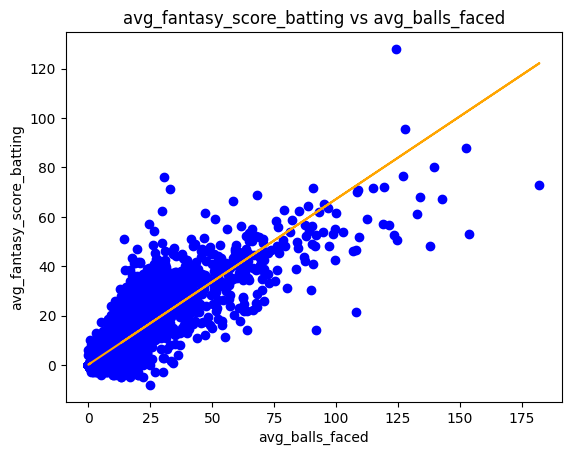

Predicted values  [90.56  0.69 13.2 ]
Real values       [56.55357143  4.72289157  2.        ]
Trained W         0.56
Trained b         0.69


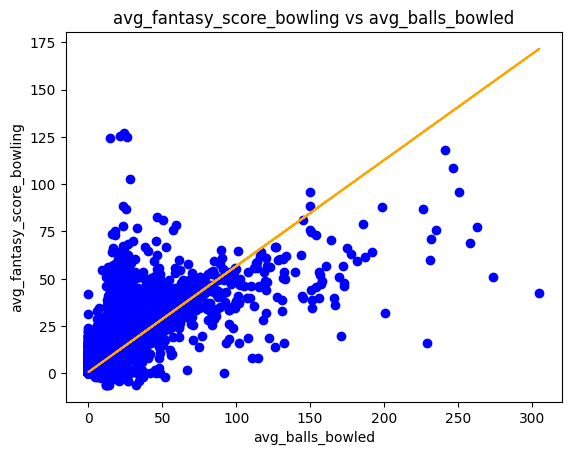

In [11]:
#learning_rate = 0.01(too high) that is causing overshoot
#new learning_rate = 0.001

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)
avg_stats_batting_df = df.groupby('player_id')[['balls_faced', 'fantasy_score_batting']].mean().reset_index()
# Renaming columns for clarity
avg_stats_batting_df.columns = ['player_id', 'avg_balls_faced', 'avg_fantasy_score_batting']
avg_stats_bowling_df = df.groupby('player_id')[['balls_bowled', 'fantasy_score_bowling']].mean().reset_index()
# Renaming columns for clarity
avg_stats_bowling_df.columns = ['player_id', 'avg_balls_bowled', 'avg_fantasy_score_bowling']


class MyLinearRegression:
    def __init__(self, learning_rate=0.001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.b = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            Y_predicted = np.dot(X, self.W) + self.b

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (Y_predicted - Y))
            db = (1 / n_samples) * np.sum(Y_predicted - Y)

            # Update parameters
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b
    


def main_batting():
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    # Assuming avg_stats_df is already defined
    df = avg_stats_batting_df   

    # Convert to NumPy arrays
    X = df['avg_balls_faced'].values.reshape(-1, 1)
    Y = df['avg_fantasy_score_batting'].values

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1/3, random_state=0
    )

    # Train model
    model = MyLinearRegression(learning_rate=0.0001, iterations=1000)
    model.fit(X_train, Y_train)

    # Predict
    Y_pred = model.predict(X_test)

    print("Predicted values ", np.round(Y_pred[:3], 2))
    print("Real values      ", Y_test[:3])
    print("Trained W        ", round(model.W[0], 2))
    print("Trained b        ", round(model.b, 2))

    # Plot
    plt.scatter(X_test, Y_test, color='blue')
    plt.plot(X_test, Y_pred, color='orange')
    plt.title('avg_fantasy_score_batting vs avg_balls_faced')
    plt.xlabel('avg_balls_faced')
    plt.ylabel('avg_fantasy_score_batting')
    plt.show()

if __name__ == "__main__":
    main_batting()

def main_bowling():
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    # Assuming avg_stats_bowling_df is already defined
    df = avg_stats_bowling_df  

    # Convert to NumPy arrays
    X = df['avg_balls_bowled'].values.reshape(-1, 1)
    Y = df['avg_fantasy_score_bowling'].values

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1/3, random_state=0
    )

    # Train model
    model = MyLinearRegression(learning_rate=0.0001, iterations=1000)
    model.fit(X_train, Y_train)

    # Predict
    Y_pred = model.predict(X_test)

    print("Predicted values ", np.round(Y_pred[:3], 2))
    print("Real values      ", Y_test[:3])
    print("Trained W        ", round(model.W[0], 2))
    print("Trained b        ", round(model.b, 2))

    # Plot
    plt.scatter(X_test, Y_test, color='blue')
    plt.plot(X_test, Y_pred, color='orange')
    plt.title('avg_fantasy_score_bowling vs avg_balls_bowled')
    plt.xlabel('avg_balls_bowled')
    plt.ylabel('avg_fantasy_score_bowling')
    plt.show()  
if __name__ == "__main__":
    main_bowling()
# Note: The MyLinearRegression class is a simple implementation of linear regression.
#learning_rate = 0.01(too high) that is causing overshoot